Name: Yue Ma (Z1934458), Nida Zaki (Z1938561)

#Data Preprocessing

There are 18 files in the PSOWE Dataset, so we first combine all the dataset into one csv file. It is easier for the further processing. We add this code details below in a comment way in order to reduce the confusion when we import the new combined dataset.

In [ ]:
# import pandas as pd
# import os
# directory = "PSOWE Dataset/DATASET/"
# files_tags = os.listdir(directory)
# softwares = ["PSOWE Dataset/DATASET/"+file for file in files_tags]
# df = pd.concat(
#     map(pd.read_csv, softwares), ignore_index=True)
# print(df)
# df.to_csv('combined.csv')

Now we use the new combined dataset to do the further programming

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
import sklearn
import re
import seaborn as sns
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [ ]:
df=pd.read_csv("combined.csv")
df.tail()

,Unnamed: 0,name,version,name.1,wmc,dit,noc,cbo,rfc,lcom,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
6955,6955,xerces,1.3.0,org.xml.sax.ErrorHandler,3,1,0,0,3,3,...,0.0,0,0.000000,1.000000,0,0,0.000000,1,1.0000,0
6956,6956,xerces,1.3.0,org.apache.xerces.readers.XMLCatalogHandler,11,1,1,1,18,15,...,1.0,0,0.000000,0.431818,0,0,8.090909,1,0.9091,0
6957,6957,xerces,1.3.0,org.apache.xerces.utils.IntStack,8,1,0,2,14,0,...,1.0,0,0.000000,0.625000,0,0,16.750000,4,1.3750,0
6958,6958,xerces,1.3.0,org.apache.xerces.msg.SchemaMessages,3,3,0,0,4,1,...,0.0,0,0.974359,1.000000,0,0,159.000000,1,0.3333,4
6959,6959,xerces,1.3.0,javax.xml.parsers.ParserConfigurationException,2,3,0,0,4,1,...,0.0,0,1.000000,0.750000,0,0,3.500000,0,0.0000,0


In [ ]:
df.describe()

,Unnamed: 0,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
count,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,...,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000
mean,3479.500000,10.325431,2.014799,0.489511,10.622126,27.344253,95.396695,5.201006,5.868391,8.015661,...,0.528755,0.784626,0.563515,2.705900,0.483764,1.256178,48.360180,4.034914,1.309725,0.389368
std,2009.323269,14.447391,1.346307,3.193506,17.403333,33.867745,711.565525,15.927248,7.286428,10.656341,...,0.468597,1.846617,10.595517,34.991135,0.770949,2.736296,1090.278372,7.913515,1.179634,1.462115
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1739.750000,3.000000,1.000000,0.000000,3.000000,8.000000,0.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,5.000000,1.000000,0.800000,0.000000
50%,3479.500000,6.000000,1.000000,0.000000,7.000000,17.000000,6.000000,2.000000,4.000000,5.000000,...,0.666667,0.000000,0.065341,0.437500,0.000000,0.000000,12.666667,2.000000,1.000000,0.000000
75%,5219.250000,12.000000,3.000000,0.000000,12.000000,35.000000,36.000000,4.000000,8.000000,10.000000,...,1.000000,1.000000,0.833333,0.625000,1.000000,1.000000,25.811652,5.000000,1.500000,0.000000
max,6959.000000,399.000000,8.000000,125.000000,499.000000,522.000000,41713.000000,498.000000,121.000000,214.000000,...,1.000000,41.000000,625.000000,875.000000,5.000000,30.000000,59875.000000,236.000000,28.666700,45.000000


In [ ]:
df.isnull().sum() #All the Nan values are at not necessary for the further processing. Since we only pass numerical values to our models.

Unnamed: 0       0
name          1396
version       1396
name.1        1396
wmc              0
dit              0
noc              0
cbo              0
rfc              0
lcom             0
ca               0
ce               0
npm              0
lcom3            0
loc              0
dam              0
moa              0
mfa              0
cam              0
ic               0
cbm              0
amc              0
max_cc           0
avg_cc           0
bug              0
dtype: int64

In [ ]:
df.dtypes

Unnamed: 0      int64
name           object
version        object
name.1         object
wmc             int64
dit             int64
noc             int64
cbo             int64
rfc             int64
lcom            int64
ca              int64
ce              int64
npm             int64
lcom3         float64
loc             int64
dam           float64
moa             int64
mfa           float64
cam           float64
ic              int64
cbm             int64
amc           float64
max_cc          int64
avg_cc        float64
bug             int64
dtype: object

In [ ]:
del df['Unnamed: 0']

In [ ]:
df.corr()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
wmc,1.000000,-0.030442,0.067341,0.390211,0.841903,0.704889,0.255546,0.478165,0.885830,-0.006296,...,0.220444,0.492572,-0.012352,-0.023121,0.093449,0.141174,0.006396,0.337821,0.188404,0.335442
dit,-0.030442,1.000000,-0.007467,-0.018007,0.057590,-0.015877,-0.064104,0.108583,-0.040942,-0.029348,...,0.088409,-0.034496,0.032391,-0.033473,0.562396,0.420757,-0.017720,-0.029492,-0.068027,0.029558
noc,0.067341,-0.007467,1.000000,0.244387,0.046353,0.027319,0.257987,0.047547,0.061492,-0.005455,...,0.054569,0.041029,-0.003121,-0.010180,0.002207,0.004164,-0.004464,0.001769,-0.005456,0.018324
cbo,0.390211,-0.018007,0.244387,1.000000,0.449201,0.274091,0.925032,0.466804,0.397431,-0.002419,...,0.111134,0.257792,-0.006797,-0.007202,0.063418,0.062940,0.009016,0.172756,0.122081,0.287396
rfc,0.841903,0.057590,0.046353,0.449201,1.000000,0.548892,0.218057,0.707369,0.730931,0.001515,...,0.319265,0.541867,-0.008050,-0.011944,0.176817,0.178091,0.032583,0.433407,0.328017,0.408347
lcom,0.704889,-0.015877,0.027319,0.274091,0.548892,1.000000,0.196321,0.320374,0.591329,-0.006936,...,0.045812,0.280765,-0.004310,-0.008072,0.020042,0.045344,-0.001032,0.155385,0.066582,0.239195
ca,0.255546,-0.064104,0.257987,0.925032,0.218057,0.196321,1.000000,0.113243,0.291937,0.003376,...,0.001725,0.120822,-0.009632,-0.012348,-0.024140,-0.007756,-0.007070,0.072050,0.030441,0.223830
ce,0.478165,0.108583,0.047547,0.466804,0.707369,0.320374,0.113243,1.000000,0.409831,-0.015334,...,0.278455,0.428971,0.003870,0.007615,0.222402,0.196318,0.036570,0.298698,0.249432,0.276330
npm,0.885830,-0.040942,0.061492,0.397431,0.730931,0.591329,0.291937,0.409831,1.000000,-0.005878,...,0.198822,0.430877,-0.011771,-0.027625,0.090976,0.148815,0.000207,0.221063,0.113158,0.298760
lcom3,-0.006296,-0.029348,-0.005455,-0.002419,0.001515,-0.006936,0.003376,-0.015334,-0.005878,1.000000,...,0.021594,0.044819,-0.001640,0.041350,-0.001428,-0.018502,0.090882,-0.003311,-0.009559,-0.013185


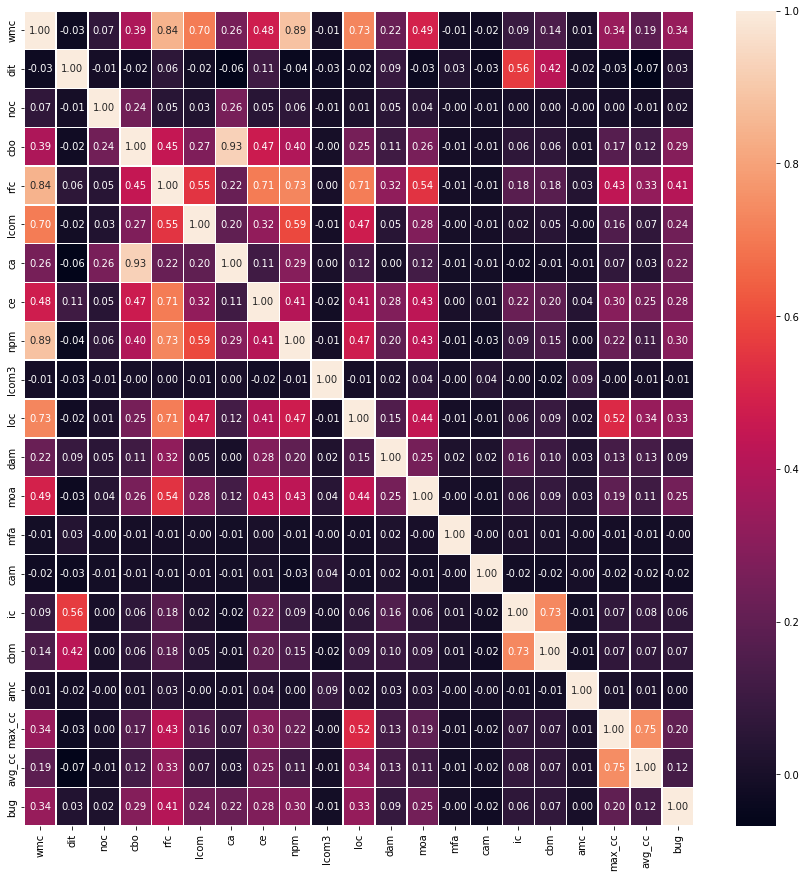

In [ ]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

In [ ]:
threshold=0.95
#Finding and removing correlated features
def correlation(dataset,threshold):
    col_corr=set() #set all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: #we are interested in absolute coefficent value
                colname = corr_matrix.columns[i] #getting the name of columns
                col_corr.add(colname)
    return col_corr


In [ ]:
threshold = 0.95
correlation(df.iloc[:,:-1],threshold)

set()

In [ ]:
threshold=0.8
#Finding and removing correlated features
def correlation(dataset,threshold):
    col_corr=set() #set all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: #we are interested in absolute coefficent value
                colname = corr_matrix.columns[i] #getting the name of columns
                col_corr.add(colname)
    return col_corr

In [ ]:
threshold = 0.8
correlation(df.iloc[:,:-1],threshold)

{'ca', 'npm', 'rfc'}

In [ ]:
df['bug'].values[df['bug'].values > 0] = 1 #If the bug's value larger than 0, which means it has defect

In [ ]:
df.groupby('bug').size()

# To use undersampling method, the following codes need to be added
# ones_subset = df.loc[df["bug"] == 1, :]
# number_of_1s = len(ones_subset)
# zeros_subset = df.loc[df["bug"] == 0, :]
# sampled_zeros = zeros_subset.sample(number_of_1s)
# print(len(sampled_zeros))
# print(len(ones_subset))
# import pandas as pd
# df=pd.concat([sampled_zeros, ones_subset])
# df.groupby('bug').size()

bug
0    5703
1    1257
dtype: int64

In [ ]:
col_names=df.columns.tolist()[3:-1]
df1=df[col_names]
df2=df['bug']
X=df1.values
y=df2.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state=1, stratify=y)

print('X-train size', X_train.size)
print('X-test size', X_test.size)
print('y-train size', y_train.size)
print('y-test size', y_test.size)

X-train size 111360
X-test size 27840
y-train size 5568
y-test size 1392


In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#Decision Tree

In [ ]:
tree = DecisionTreeClassifier(criterion='gini',
                                max_depth=4,
                              random_state=1)
tree.fit(X_train_std, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [ ]:
tree.score(X_test_std,y_test)

0.8225574712643678

Cross validation for training dataset

In [ ]:
from sklearn.model_selection import cross_val_score
cross_tree_scores = -1 * cross_val_score(tree, X_train_std, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", cross_tree_scores)
print("The average MAE score for training set is ", cross_tree_scores.mean())

MAE scores:
 [0.17504488 0.17504488 0.18491921 0.18238994 0.17430368]
The average MAE score for training set is  0.1783405195010493


classification report

In [ ]:
y_pred = tree.predict(X_test_std)
print("Decision Tree Algorithm")
print("Classification Report : \n",classification_report(y_test, y_pred))

Decision Tree Algorithm
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      1141
           1       0.56      0.08      0.13       251

    accuracy                           0.82      1392
   macro avg       0.69      0.53      0.52      1392
weighted avg       0.78      0.82      0.76      1392



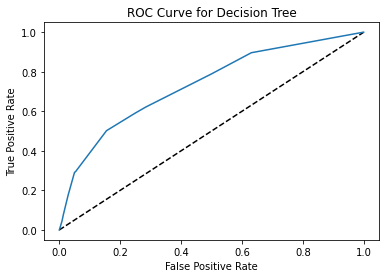

0.7340977893858397


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = tree.predict_proba(X_test_std)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1],[0, 1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.show()

mlp_auc = metrics.auc(fpr, tpr)
print(mlp_auc)

In [ ]:
importance=tree.feature_importances_
importance_values=[]
for i,v in enumerate(importance):
    importance_values.append(v)
    print('The importance for feature ',col_names[i],' is %.3f'%v)

The importance for feature  wmc  is 0.000
The importance for feature  dit  is 0.026
The importance for feature  noc  is 0.000
The importance for feature  cbo  is 0.016
The importance for feature  rfc  is 0.128
The importance for feature  lcom  is 0.000
The importance for feature  ca  is 0.000
The importance for feature  ce  is 0.070
The importance for feature  npm  is 0.000
The importance for feature  lcom3  is 0.000
The importance for feature  loc  is 0.638
The importance for feature  dam  is 0.000
The importance for feature  moa  is 0.000
The importance for feature  mfa  is 0.000
The importance for feature  cam  is 0.056
The importance for feature  ic  is 0.018
The importance for feature  cbm  is 0.000
The importance for feature  amc  is 0.000
The importance for feature  max_cc  is 0.029
The importance for feature  avg_cc  is 0.020


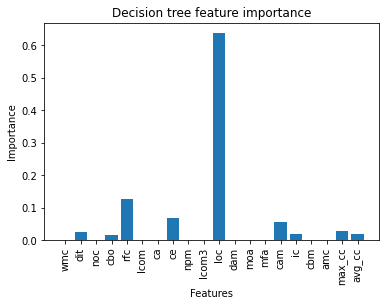

In [ ]:
figsize=(20,10)
plt.bar(col_names, importance_values)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Decision tree feature importance')
plt.show()

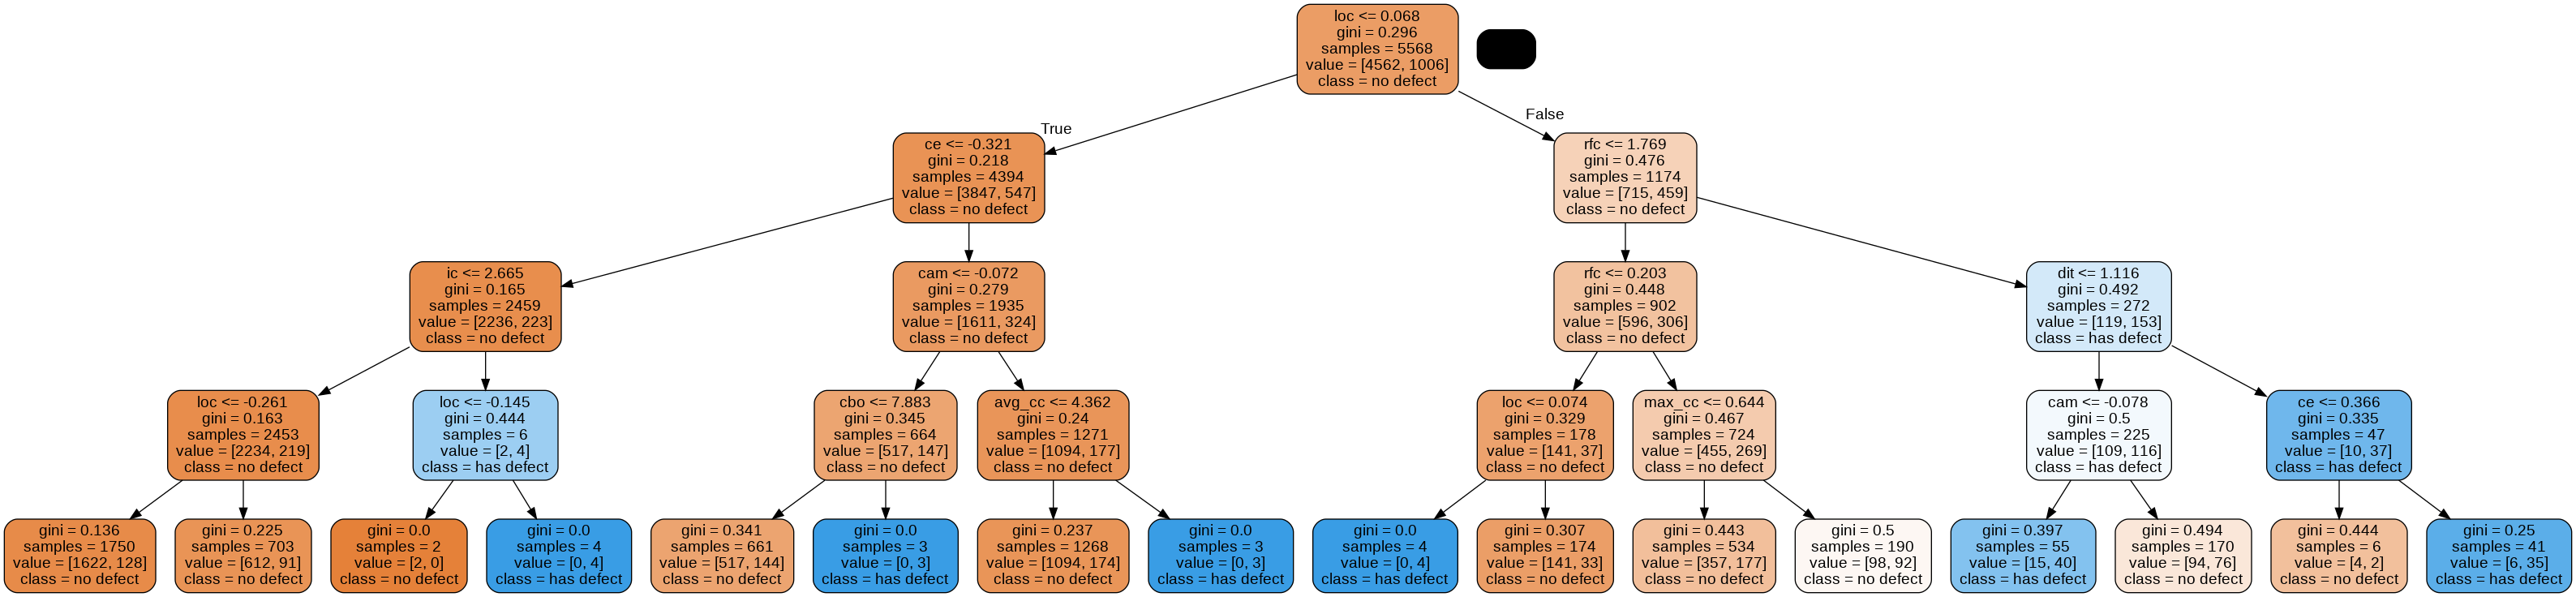

In [ ]:
dot_data = export_graphviz(tree,
                           filled=True,
                           rounded=True,
                           class_names=["no defect",'has defect'],
                           feature_names=col_names,
                           out_file=None)

graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

#Random Forest

In [ ]:
forest = RandomForestClassifier(criterion='gini',
                                random_state=1)
forest.fit(X_train_std, y_train)
y_pred = forest.predict(X_test_std)
accuracy = forest.score(X_test_std, y_test)
print("Accuracy : \n",accuracy)
print('\n')
print("Random Forest Algorithm")
print("Classification Report : \n",classification_report(y_test, y_pred))

Accuracy : 
 0.826867816091954


Random Forest Algorithm
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      1141
           1       0.54      0.28      0.37       251

    accuracy                           0.83      1392
   macro avg       0.70      0.61      0.63      1392
weighted avg       0.80      0.83      0.80      1392



Cross validation on training set

In [ ]:
cross_forest_scores = -1 * cross_val_score(forest, X_train_std, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", cross_forest_scores)
print("The average MAE score for training set is ", cross_forest_scores.mean())

MAE scores:
 [0.18132855 0.17684022 0.18402154 0.18508535 0.17610063]
The average MAE score for training set is  0.18067525780679128


Roc curve

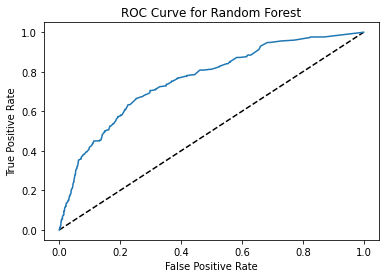

0.7602124368433366


In [ ]:
y_pred_prob = forest.predict_proba(X_test_std)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1],[0, 1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()

mlp_auc = metrics.auc(fpr, tpr)
print(mlp_auc)

In [ ]:
importance=forest.feature_importances_
importance_values=[]
for i,v in enumerate(importance):
    importance_values.append(v)
    print('The importance for feature ',col_names[i],' is %.3f'%v)

The importance for feature  wmc  is 0.050
The importance for feature  dit  is 0.024
The importance for feature  noc  is 0.016
The importance for feature  cbo  is 0.066
The importance for feature  rfc  is 0.087
The importance for feature  lcom  is 0.052
The importance for feature  ca  is 0.052
The importance for feature  ce  is 0.055
The importance for feature  npm  is 0.048
The importance for feature  lcom3  is 0.057
The importance for feature  loc  is 0.105
The importance for feature  dam  is 0.022
The importance for feature  moa  is 0.024
The importance for feature  mfa  is 0.042
The importance for feature  cam  is 0.084
The importance for feature  ic  is 0.015
The importance for feature  cbm  is 0.024
The importance for feature  amc  is 0.077
The importance for feature  max_cc  is 0.041
The importance for feature  avg_cc  is 0.060


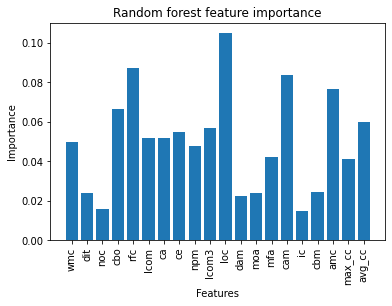

In [ ]:
figsize=(20,10)
plt.bar(col_names, importance_values)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random forest feature importance')
plt.show()

#Ensemble- Bagging

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=None,
                              random_state=1)

bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=100,
                        max_samples=1.0,
                        max_features=1.0,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=1,
                        random_state=1)
bag = bag.fit(X_train_std, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test_std)

bag_test = accuracy_score(y_test, y_test_pred)
print('Bagging testing accuracy is: ', bag_test)

Bagging testing accuracy is:  0.8275862068965517


Cross validation on training set

In [ ]:
cross_bag_scores = -1 * cross_val_score(bag, X_train_std, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", cross_bag_scores)
print("The average MAE score for training set is ", cross_bag_scores.mean())

MAE scores:
 [0.17953321 0.17594255 0.18671454 0.18867925 0.17879605]
The average MAE score for training set is  0.1819331194420114


In [ ]:
print("Ensemble Bagging Algorithm")
print("Classification Report : \n",classification_report(y_test, y_test_pred))

Ensemble Bagging Algorithm
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      1141
           1       0.54      0.28      0.37       251

    accuracy                           0.83      1392
   macro avg       0.70      0.62      0.64      1392
weighted avg       0.80      0.83      0.80      1392



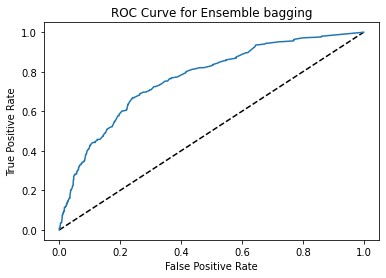

0.7670876528941204


In [ ]:
y_pred_prob = bag.predict_proba(X_test_std)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1],[0, 1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ensemble bagging')
plt.show()

mlp_auc = metrics.auc(fpr, tpr)
print(mlp_auc)

#K nearest neighbours

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train_std, y_train)
accuracy = clf.score(X_test_std, y_test)
print("Accuracy : \n",accuracy)

Accuracy : 
 0.8125


Cross validation on training set

In [ ]:
cross_knn_scores = -1 * cross_val_score(clf, X_train_std, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", cross_knn_scores)
print("The average MAE score for training set is ", cross_knn_scores.mean())

MAE scores:
 [0.18581688 0.18312388 0.19748654 0.1967655  0.16621743]
The average MAE score for training set is  0.1858820436138278


Classification report

In [ ]:
y_pred = clf.predict(X_test_std)
print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))
print("K Nearest Neighbor Algorithm")
print("Classification report : \n",classification_report(y_test, y_pred))

Confusion Matrix : 
 [[1074   67]
 [ 194   57]]
K Nearest Neighbor Algorithm
Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1141
           1       0.46      0.23      0.30       251

    accuracy                           0.81      1392
   macro avg       0.65      0.58      0.60      1392
weighted avg       0.78      0.81      0.79      1392



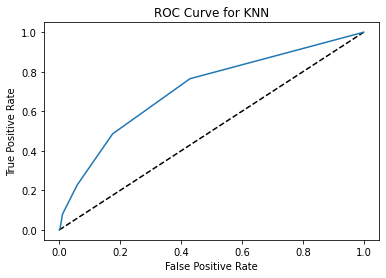

0.711787381586712


In [ ]:
y_pred_prob = clf.predict_proba(X_test_std)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1],[0, 1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.show()

mlp_auc = metrics.auc(fpr, tpr)
print(mlp_auc)

#SVM

In [ ]:
svm_model = SVC(kernel="sigmoid",C=1,gamma=0.5,probability=True) # kernel here can also be linear, poly, rbf
svm_model.fit(X_train_std,np.ravel(y_train))
y_pred = svm_model.predict(X_test_std)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7327586206896551


Cross validation on training set

In [ ]:
cross_svm_scores = -1 * cross_val_score(svm_model, X_train_std, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", cross_svm_scores)
print("The average MAE score for training set is ", cross_svm_scores.mean())

MAE scores:
 [0.26660682 0.26481149 0.26391382 0.26145553 0.26145553]
The average MAE score for training set is  0.2636486375316361


classification report

In [ ]:
print("Support Vector Machine (SVM) Algorithm")
print("Classification report : \n",classification_report(y_test, y_pred))

Support Vector Machine (SVM) Algorithm
Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1141
           1       0.26      0.25      0.25       251

    accuracy                           0.73      1392
   macro avg       0.55      0.54      0.55      1392
weighted avg       0.73      0.73      0.73      1392



Roc curve

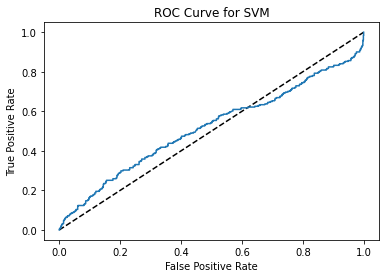

0.5153059977443426


In [ ]:
y_pred_prob = svm_model.predict_proba(X_test_std)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1],[0, 1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.show()

model_auc = metrics.auc(fpr, tpr)
print(model_auc)

# Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

<h3> Gaussian Bayes </h3>

In [ ]:
gaussian_model = GaussianNB()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

gaussian_model.fit(X_train_std, y_train)

y_pred = gaussian_model.predict(X_test_std)

#Summary of the predictions made by the classifier
print("Gaussian Naive Bayes Algorithm")
print("Classification Report : \n",classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(y_test,y_pred))

Gaussian Naive Bayes Algorithm
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.25      0.40      1141
           1       0.21      0.92      0.35       251

    accuracy                           0.37      1392
   macro avg       0.57      0.59      0.37      1392
weighted avg       0.81      0.37      0.39      1392

[[290 851]
 [ 20 231]]
Accuracy:  0.3742816091954023


Cross validation on training set

In [ ]:
cross_gau_scores = -1 * cross_val_score(gaussian_model, X_train_std, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", cross_gau_scores)
print("The average MAE score for training set is ", cross_gau_scores.mean())

MAE scores:
 [0.80969479 0.58976661 0.63285458 0.70530099 0.26594789]
The average MAE score for training set is  0.6007129710730539


ROC curve

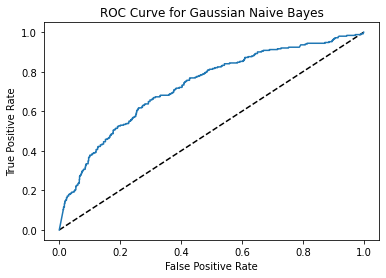

0.7282631088267439


In [ ]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = gaussian_model.predict_proba(X_test_std)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1],[0, 1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes')
plt.show()

gaussian_model_auc = metrics.auc(fpr, tpr)
print(gaussian_model_auc)

<h3> Bernoulli Naive Bayes </h3>

In [ ]:
bernoulli_model = BernoulliNB()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

bernoulli_model.fit(X_train_std, y_train)

y_pred = bernoulli_model.predict(X_test_std)

#Summary of the predictions made by the classifier
print("Bernoulli Naive Bayes Algorithm")
print("Classification Report : \n",classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(y_test,y_pred))

Bernoulli Naive Bayes Algorithm
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.77      0.83      1141
           1       0.36      0.57      0.44       251

    accuracy                           0.74      1392
   macro avg       0.62      0.67      0.63      1392
weighted avg       0.80      0.74      0.76      1392

Accuracy:  0.7370689655172413


Cross validation on training set

In [ ]:
cross_ber_scores = -1 * cross_val_score(bernoulli_model, X_train_std, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", cross_ber_scores)
print("The average MAE score for training set is ", cross_ber_scores.mean())

MAE scores:
 [0.24416517 0.24955117 0.2459605  0.2785265  0.25336927]
The average MAE score for training set is  0.2543145234788472


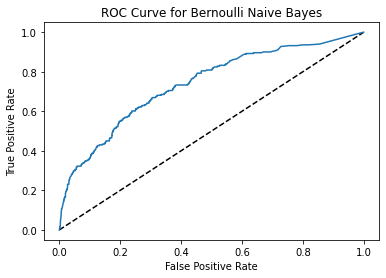

0.7380312230482104


In [ ]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = bernoulli_model.predict_proba(X_test_std)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1],[0, 1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bernoulli Naive Bayes')
plt.show()

bernoulli_model_auc = metrics.auc(fpr, tpr)
print(bernoulli_model_auc)

# Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(20,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train_std, y_train,
          batch_size=32, epochs=100)

Epoch 1/100
174/174 [==============================] - 1s 2ms/step - loss: 0.4855 - accuracy: 0.8026
Epoch 2/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.8227
Epoch 3/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8263
Epoch 4/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.8274
Epoch 5/100
174/174 [==============================] - 0s 3ms/step - loss: 0.4128 - accuracy: 0.8303
Epoch 6/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8299
Epoch 7/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8310
Epoch 8/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8321
Epoch 9/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8328
Epoch 10/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4048 - accura

In [ ]:
model2 = Sequential([
    Dense(32, activation='relu', input_shape=(20,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model2.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist2 = model2.fit(X_train_std, y_train,
          batch_size=32, epochs=100)

Epoch 1/100
174/174 [==============================] - 1s 2ms/step - loss: 0.5580 - accuracy: 0.7703
Epoch 2/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.8218
Epoch 3/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.8206
Epoch 4/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8211
Epoch 5/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4390 - accuracy: 0.8218
Epoch 6/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.8215
Epoch 7/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.8229
Epoch 8/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.8235
Epoch 9/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.8238
Epoch 10/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4300 - accura

In [ ]:
model3 = Sequential([
    Dense(32, activation='relu', input_shape=(20,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist3 = model3.fit(X_train_std, y_train,
          batch_size=32, epochs=100)

Epoch 1/100
174/174 [==============================] - 1s 2ms/step - loss: 0.4774 - accuracy: 0.8120
Epoch 2/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.8256
Epoch 3/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8287
Epoch 4/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8303
Epoch 5/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8323
Epoch 6/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8330
Epoch 7/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8348
Epoch 8/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8342
Epoch 9/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8349
Epoch 10/100
174/174 [==============================] - 0s 2ms/step - loss: 0.4037 - accura

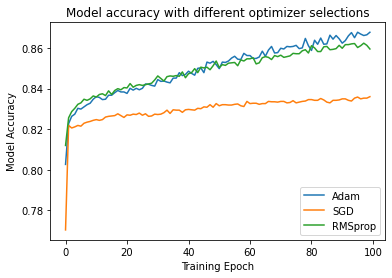

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist2.history['accuracy'])
plt.plot(hist3.history['accuracy'])
plt.title('Model accuracy with different optimizer selections')
plt.ylabel('Model Accuracy')
plt.xlabel('Training Epoch')
plt.legend(['Adam','SGD','RMSprop'], loc='lower right')
plt.show()

In [ ]:
model.evaluate(X_test_std, y_test)[1]

44/44 [==============================] - 0s 2ms/step - loss: 0.5357 - accuracy: 0.8211


0.8211206793785095

In [ ]:
model2.evaluate(X_test_std, y_test)[1]

44/44 [==============================] - 0s 3ms/step - loss: 0.4108 - accuracy: 0.8326


0.8326149582862854

In [ ]:
model3.evaluate(X_test_std, y_test)[1]

44/44 [==============================] - 0s 2ms/step - loss: 0.5557 - accuracy: 0.8197


0.8196839094161987

# Multi Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve,accuracy_score,classification_report,f1_score, precision_score, recall_score, confusion_matrix

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Multi Layer Perceptron Algorithm
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      1141
           1       0.57      0.22      0.32       251

    accuracy                           0.83      1392
   macro avg       0.71      0.59      0.61      1392
weighted avg       0.80      0.83      0.80      1392

Accuracy:  83.0 %
F1 Score:  61.0 %
Precision:  71.0 %
Recall:  59.0 %


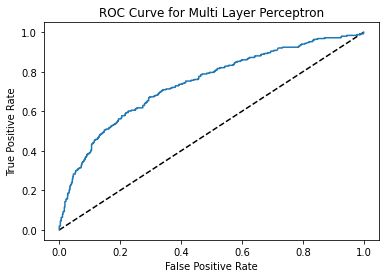

0.7400372218400718


In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train_std, y_train)
y_pred = mlp.predict(X_test_std)

#Summary of the predictions made by the classifier
print("Multi Layer Perceptron Algorithm")
mlp_rep = classification_report(y_test, y_pred)
print("Classification Report : \n", mlp_rep)

#Accuracy score
acc_mlp = round(accuracy_score(y_test,y_pred),2) * 100
f1_mlp = round(f1_score(y_test, y_pred, average="macro"),2) * 100
pr_mlp = round(precision_score(y_test, y_pred, average="macro"),2) * 100
rc_mlp = round(recall_score(y_test, y_pred, average="macro"),2) * 100

print("Accuracy: ",acc_mlp,"%")
print("F1 Score: ",f1_mlp,"%")
print("Precision: ",pr_mlp,"%")
print("Recall: ",rc_mlp,"%")

# Compute predicted probabilities: y_pred_prob
y_pred_prob = mlp.predict_proba(X_test_std)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1],[0, 1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi Layer Perceptron')
plt.show()

mlp_auc = metrics.auc(fpr, tpr)
print(mlp_auc)

Cross validation on training set

[[1099   42]
 [ 195   56]]


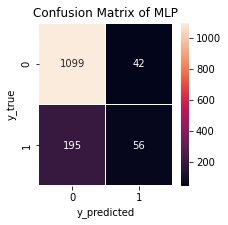

In [ ]:
confusion_matrix_mlp = confusion_matrix(y_test,y_pred)

print(confusion_matrix_mlp)

f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(confusion_matrix_mlp, annot = True, linewidths = 0.5, color = "blue", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of MLP")
plt.show()

# Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SequentialFeatureSelector

Ada Boost Algorithm
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1141
           1       0.42      0.31      0.36       251

    accuracy                           0.80      1392
   macro avg       0.64      0.61      0.62      1392
weighted avg       0.78      0.80      0.79      1392

Accuracy:  80.0 %
F1 Score:  62.0 %
Precision:  64.0 %
Recall:  61.0 %


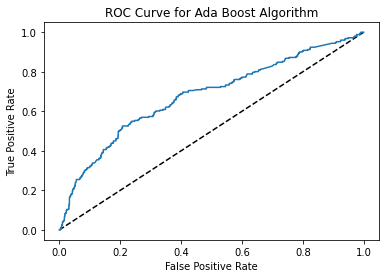

0.6773187704920896


In [ ]:
adb = AdaBoostClassifier(n_estimators=50, base_estimator=tree,learning_rate=1)
# Add silent=True to avoid printing out updates with each cycle
adb.fit(X_train_std, y_train)
y_pred = adb.predict(X_test_std)

#Summary of the predictions made by the classifier
print("Ada Boost Algorithm")
adb_rep = classification_report(y_test, y_pred)
print("Classification Report : \n", adb_rep)

#Accuracy score
acc_adb = round(accuracy_score(y_pred,y_test),2) * 100
f1_adb = round(f1_score(y_test, y_pred, average="macro"),2) * 100
pr_adb = round(precision_score(y_test, y_pred, average="macro"),2) * 100
rc_adb = round(recall_score(y_test, y_pred, average="macro"),2) * 100

print("Accuracy: ",acc_adb,"%")
print("F1 Score: ",f1_adb,"%")
print("Precision: ",pr_adb,"%")
print("Recall: ",rc_adb,"%")

# Compute predicted probabilities: y_pred_prob
y_pred_prob = adb.predict_proba(X_test_std)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1],[0, 1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ada Boost Algorithm')
plt.show()

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

adb_auc = metrics.auc(fpr, tpr)
print(adb_auc)

Cross validation on training set

In [ ]:
cross_adb_scores = -1 * cross_val_score(adb, X_train_std, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", cross_adb_scores)
print("The average MAE score for training set is ", cross_adb_scores.mean())

MAE scores:
 [0.19389587 0.2037702  0.19210054 0.20125786 0.21024259]
The average MAE score for training set is  0.20025341121171208


# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

Gradient Boosting Algorithm
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1141
           1       0.70      0.20      0.31       251

    accuracy                           0.84      1392
   macro avg       0.78      0.59      0.61      1392
weighted avg       0.82      0.84      0.80      1392

Accuracy:  84.0 %
F1 Score:  61.0 %
Precision:  78.0 %
Recall:  59.0 %


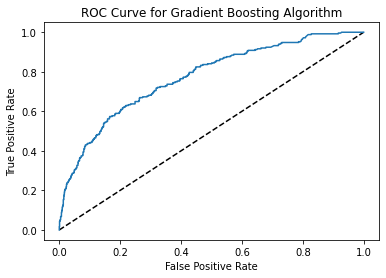

0.7721070145360713


In [ ]:
gbc = GradientBoostingClassifier()
# Add silent=True to avoid printing out updates with each cycle
gbc.fit(X_train_std, y_train)
y_pred = gbc.predict(X_test_std)

#Summary of the predictions made by the classifier
print("Gradient Boosting Algorithm")
gbc_rep = classification_report(y_test, y_pred)
print("Classification Report : \n", gbc_rep)

#Accuracy score
acc_gbc = round(accuracy_score(y_pred,y_test),2) * 100
f1_gbc = round(f1_score(y_test, y_pred, average="macro"),2) * 100
pr_gbc = round(precision_score(y_test, y_pred, average="macro"),2) * 100
rc_gbc = round(recall_score(y_test, y_pred, average="macro"),2) * 100

print("Accuracy: ",acc_gbc,"%")
print("F1 Score: ",f1_gbc,"%")
print("Precision: ",pr_gbc,"%")
print("Recall: ",rc_gbc,"%")

# Compute predicted probabilities: y_pred_prob
y_pred_prob = gbc.predict_proba(X_test_std)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1],[0, 1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Algorithm')
plt.show()

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

gbc_auc = metrics.auc(fpr, tpr)
print(gbc_auc)

Cross validation on training set

In [ ]:
cross_gbc_scores = -1 * cross_val_score(gbc, X_train_std, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", cross_gbc_scores)
print("The average MAE score for training set is ", cross_gbc_scores.mean())

MAE scores:
 [0.17324955 0.17953321 0.18581688 0.18149146 0.17340521]
The average MAE score for training set is  0.1786992633169931


# XGBoost

In [ ]:
from xgboost import XGBClassifier

XG Boost Algorithm
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1141
           1       0.64      0.19      0.29       251

    accuracy                           0.83      1392
   macro avg       0.74      0.58      0.60      1392
weighted avg       0.81      0.83      0.79      1392

Accuracy:  83.0 %
F1 Score:  60.0 %
Precision:  74.0 %
Recall:  57.99999999999999 %


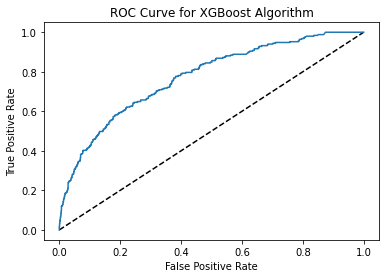

0.7714959618144425


In [ ]:
xgb = XGBClassifier()
# Add silent=True to avoid printing out updates with each cycle
xgb.fit(X_train_std, y_train)
y_pred = xgb.predict(X_test_std)

#Summary of the predictions made by the classifier
print("XG Boost Algorithm")
xgb_rep = classification_report(y_test, y_pred)
print("Classification Report : \n", xgb_rep)

#Accuracy score
acc_xgb = round(accuracy_score(y_pred,y_test),2) * 100
f1_xgb = round(f1_score(y_test, y_pred, average="macro"),2) * 100
pr_xgb = round(precision_score(y_test, y_pred, average="macro"),2) * 100
rc_xgb = round(recall_score(y_test, y_pred, average="macro"),2) * 100

print("Accuracy: ",acc_xgb,"%")
print("F1 Score: ",f1_xgb,"%")
print("Precision: ",pr_xgb,"%")
print("Recall: ",rc_xgb,"%")

# Compute predicted probabilities: y_pred_prob
y_pred_prob = xgb.predict_proba(X_test_std)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1],[0, 1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Algorithm')
plt.show()

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

xgb_auc = metrics.auc(fpr, tpr)
print(xgb_auc)

cross validation on training set

In [ ]:
cross_xgb_scores = -1 * cross_val_score(xgb, X_train_std, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", cross_xgb_scores)
print("The average MAE score for training set is ", cross_xgb_scores.mean())

MAE scores:
 [0.17145422 0.17235189 0.19389587 0.18867925 0.1671159 ]
The average MAE score for training set is  0.17869942462266572


In [ ]:
importance=xgb.feature_importances_
importance_values=[]
for i,v in enumerate(importance):
    importance_values.append(v)
    print('The importance for feature ',col_names[i],' is %.3f'%v)

The importance for feature  wmc  is 0.028
The importance for feature  dit  is 0.023
The importance for feature  noc  is 0.038
The importance for feature  cbo  is 0.032
The importance for feature  rfc  is 0.145
The importance for feature  lcom  is 0.030
The importance for feature  ca  is 0.042
The importance for feature  ce  is 0.042
The importance for feature  npm  is 0.028
The importance for feature  lcom3  is 0.040
The importance for feature  loc  is 0.232
The importance for feature  dam  is 0.024
The importance for feature  moa  is 0.033
The importance for feature  mfa  is 0.035
The importance for feature  cam  is 0.033
The importance for feature  ic  is 0.034
The importance for feature  cbm  is 0.042
The importance for feature  amc  is 0.041
The importance for feature  max_cc  is 0.055
The importance for feature  avg_cc  is 0.025


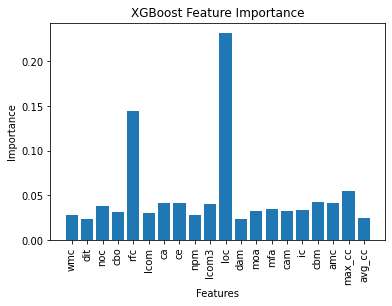

In [ ]:
figsize=(20,10)
plt.bar(col_names, importance_values)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importance')
plt.show()